In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the MNIST dataset in Keras

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

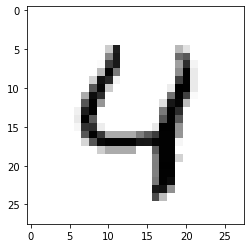

In [5]:
sample = 4
image = test_images[sample]
# plot the sample
fig = plt.figure
# plt.imshow(image, cmap='gray')
# plt.imshow(image, cmap='gray_r')
plt.imshow(image, cmap = plt.cm.binary)
plt.show()

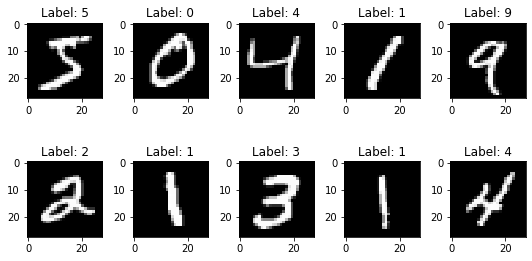

In [6]:
num = 10
images = train_images[:num]
labels = train_labels[:num]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [7]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [8]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [9]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
print(test_labels)
print(np.unique(test_labels))

[7 2 1 ... 4 5 6]
[0 1 2 3 4 5 6 7 8 9]


# The network Architechture

In [11]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# The rectified linear activation function or ReLU
# for short is a piecewise linear function that will output the input directly if it is positive,
# otherwise, it will output zero
network.add(layers.Dense(10, activation='softmax'))
# Softmax turn logits (numeric output of the last linear layer of a multi-class classification neural network)
# into probabilities by take the exponents of each output and then normalize each number by the sum of those exponents
# so the entire output vector adds up to one

Using TensorFlow backend.


# The compilation step

In [12]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Preparing the image data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))   #changed from 3d to 2d
train_images = train_images.astype('float32') / 255    #Normalization scale in bt 0-1
test_images = test_images.reshape((10000, 28 * 28))  #changed from 3d to 2d
test_images = test_images.astype('float32') / 255    # Normalization scale in bt 0-1

In [14]:
train_images.shape

(60000, 784)

# Preparing the labels

In [15]:
# On_hot_encode
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# train_labels.shape
# train_labels[1:1,::]

In [17]:
#  Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}
lbl =np.array([0, 2, 1, 2, 0])
lbl.shape
# `to_categorical` converts this into a matrix with as many
# columns as there are classes. The number of rows
# stays the same.
cats = to_categorical(lbl)
cats

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Train model

In [18]:
# network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [19]:
# test_loss, test_acc = network.evaluate(test_images, test_labels)
# print('test_acc:', test_acc)
# print('test_loss: ', test_loss)

In [20]:
# network.summary()

In [21]:
to_pred = test_images[9].reshape(1, 28*28)
to_pred = to_pred.astype('float32') / 256
network.predict(to_pred).argmax()

2

In [22]:
n= 20
batch_size = train_images[128 * n:128 * (n + 1)]
batch_size

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### naive implementation of an element-wise relu operation:

In [23]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

d2 = np.array([[1., -1., -4.],
               [3., 0., 1.],
               [-10., 1., 4.],
               [0., -5., 1.],
               [1., 0., 0.]])

naive_relu(d2)

array([[1., 0., 0.],
       [3., 0., 1.],
       [0., 1., 4.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [24]:
d2[0,2]

-4.0

In [25]:
arr_2d =  np.array([[1., -1., -4.],
               [3., 0., 1.],
               [-10., 1., 4.],
               [0., -5., 1.],
               [1., 0., 0.]])

In [26]:
for i in range(arr_2d.shape[0]):        # here d2.shape[0] = no. of rows in d2 array
    for j in range(arr_2d.shape[1]):    # here d2.shape[1] = no. of cols in d2 array
        arr_2d[i, j] = max(arr_2d[i, j], 0)
print(arr_2d)

[[1. 0. 0.]
 [3. 0. 1.]
 [0. 1. 4.]
 [0. 0. 1.]
 [1. 0. 0.]]


### elemant wise addition

In [27]:
b = np.array([[1., -1., -4.],
               [3., 0., 1.],
               [-10., 1., 4.],
               [0., -5., 1.],
               [1., 0., 0.]])

print(b)
print()
print(arr_2d)

[[  1.  -1.  -4.]
 [  3.   0.   1.]
 [-10.   1.   4.]
 [  0.  -5.   1.]
 [  1.   0.   0.]]

[[1. 0. 0.]
 [3. 0. 1.]
 [0. 1. 4.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [28]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

naive_add(arr_2d,b )

array([[  2.,  -1.,  -4.],
       [  6.,   0.,   2.],
       [-10.,   2.,   8.],
       [  0.,  -5.,   2.],
       [  2.,   0.,   0.]])

### Basic linear algebra subprograms which can be done esily with numpy

In [29]:
z = arr_2d + b
output = np.maximum(arr_2d, 0.)
print(z, output, sep='\n\n')

[[  2.  -1.  -4.]
 [  6.   0.   2.]
 [-10.   2.   8.]
 [  0.  -5.   2.]
 [  2.   0.   0.]]

[[1. 0. 0.]
 [3. 0. 1.]
 [0. 1. 4.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Broadcasting

In [30]:
# broadcasting is peformed when we try to add 2d matrix and a 1d vector
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [32]:
naive_add_matrix_and_vector(arr_2d, np.array([1, -3, 4]))

array([[ 2., -3.,  4.],
       [ 4., -3.,  5.],
       [ 1., -2.,  8.],
       [ 1., -3.,  5.],
       [ 2., -3.,  4.]])

In [50]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
arr_1d = np.array([1, -3, 4])
z

array([[[[0.60517051, 0.32622996, 0.59877771, ..., 0.58324441,
          0.53095174, 0.63202632],
         [0.59050075, 0.77912875, 0.65499353, ..., 0.26623608,
          0.39679943, 0.74220553],
         [0.26743111, 0.77990798, 0.5262161 , ..., 0.74415227,
          0.77319883, 0.23981563],
         ...,
         [0.56732435, 0.69766581, 0.39674883, ..., 0.68123422,
          0.27720099, 0.91679881],
         [0.15098698, 0.78892576, 0.74805422, ..., 0.6493512 ,
          0.95121474, 0.93272783],
         [0.77067573, 0.45040943, 0.72411292, ..., 0.89939231,
          0.87797074, 0.40127304]],

        [[0.88810412, 0.79232323, 0.41822432, ..., 0.44691489,
          0.53095174, 0.55073428],
         [0.86005148, 0.43765859, 0.53942515, ..., 0.53451347,
          0.63387825, 0.74220553],
         [0.26743111, 0.64025754, 0.5262161 , ..., 0.37709055,
          0.77319883, 0.69055689],
         ...,
         [0.70738042, 0.45913346, 0.30138447, ..., 0.37759347,
          0.27720099, 0.7

In [38]:
# element wise product   *
# dot in keras nad numpy
# tf used . for dot prodict
# k = np.dot(x, y)
# t= x.y

AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [53]:
# dot prodict of 1d vec
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [54]:
naive_vector_dot(np.array([0, 2, 5]),np.array([1, -3, 4]))

14.0

In [57]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [58]:
naive_matrix_vector_dot(arr_2d, np.array([2, 4,-3]))

array([ 2.,  3., -8., -3.,  2.])

In [59]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z
naive_matrix_vector_dot(arr_2d,arr_1d)

array([ 1.,  7., 13.,  4.,  1.])

### Tensor reshaping

In [60]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])
print(x.shape)

(3, 2)


In [62]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [64]:
x.reshape(2, 3)

array([[0., 1., 2.],
       [3., 4., 5.]])